# An Introduction to MATLAB
`2020-11-25`

_Zhiyuan Chen, Department of Trade Economics, Renmin Business School_

# An overview

MATLAB (MATrix LABoratory) is a very popular software in engeering, economics, finance and many areas. It is MATLAB is a software package for high-performance numerical computation and visualization. It provides an interactive environment with hundreds of built-in functions for technical computation, graphics, and animation. Best of all, it also provides easy extensibility with its own high-level programming language.

You are referred to Chapter 1 in Pratap (2010) for basics of MATLAB. 

# The Basics
* Lauching MATLAB and do simple calculations
* Create and work with arrays, vectors, and matrices
* Plot graphs
* Write and execute a script-file, use of 
* Write and execute a function-file

## Simple Calculations

In [1]:
2+2


ans =

     4




In [2]:
x = 2 +2 


x =

     4




In [3]:
y = 2^2 + log(pi)*sin(x)


y =

    3.1337




In [4]:
% floating point output is controlled by the format command
format short e
y


y =

   3.1337e+00




In [6]:
format long
y


y =

   3.133665565935614




In [ ]:
% quit matlab: quit

## Arrays

In [1]:
x = [1 2 3]


x =

     1     2     3




In [2]:
y = [2; 1; 5]


y =

     2
     1
     5




## Plots

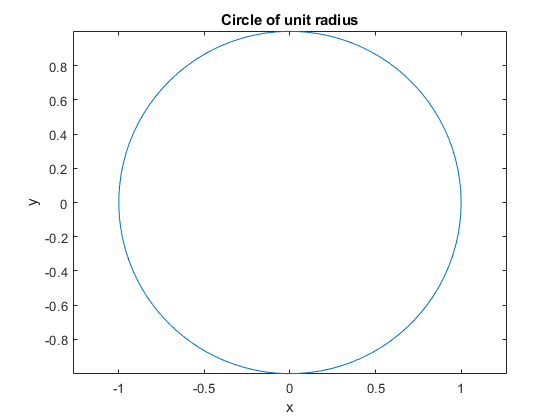

In [1]:
theta = linspace(0, 2*pi, 100);
x = cos(theta);
y = sin(theta);
plot(x, y)
axis('equal') % set the length scales of the two axes be the same
xlabel('x')
ylabel('y')
title('Circle of unit radius')

## Executing Matlab Functions

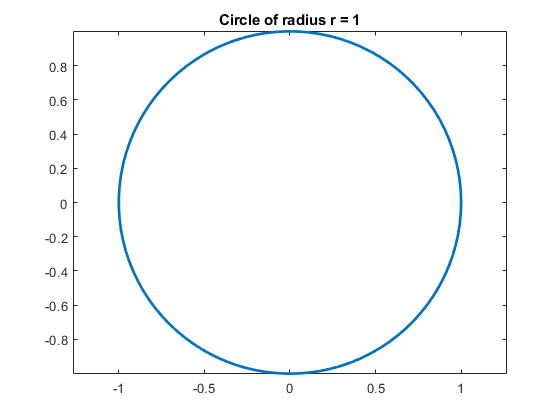

In [2]:
circlefn(1);

## Solving Linear Systems
In many occasions, we need to solve 
$$
Ax = b
$$
A second system is obtained by altering the right-hand side:
$$
A(x+\deltax) = b +\delta b
$$

Think of $\delta b$ being the error in $b$ and $\delta x$ being the resulting error in $x$. The condition number is a relative error magnification factor changes:

$$
\frac{\|\delta x\|}{\|x\|} \leq \kappa(A) \frac{\|\delta b\|}{\|b\|}
$$

In [3]:
A = [4.1 2.8; 9.7 6.6];
b = A(:, 1)
x = A\b


b =

    4.1000
    9.7000


x =

    1.0000
   -0.0000




In [4]:
b1 = [4.11; 9.7]
x1 = A\b1


b1 =

    4.1100
    9.7000


x1 =

    0.3400
    0.9700




kappa = cond(A)

__Official Example by Matlab__

Examine why solving a linear system by inverting the matrix using inv(A)*b is inferior to solving it directly using the backslash operator, x = A\b.
Create a random matrix A of order 500 that is constructed so that its condition number, cond(A), is 1e10, and its norm, norm(A), is 1. The exact solution x is a random vector of length 500, and the right side is b = A*x. Thus the system of linear equations is badly conditioned, but consistent.

In [8]:
n = 500; 
Q = orth(randn(n,n));
d = logspace(0,-10,n);
A = Q*diag(d)*Q';
x = randn(n,1);
b = A*x;

In [9]:
tic
y = inv(A)*b; 
toc

Elapsed time is 0.013413 seconds.



In [10]:
err_inv = norm(y-x)


err_inv =

   3.9029e-06




In [11]:
res_inv = norm(A*y-b)


res_inv =

   4.6758e-07




Now, solve the same linear system using the backslash operator \.

In [13]:
tic
z = A\b;
toc

Elapsed time is 0.008918 seconds.



In [14]:
err_bs = norm(z-x)
res_bs = norm(A*z-b)


err_bs =

   2.9155e-06


res_bs =

   3.2543e-15




The backslash calculation is quicker and has less residual error by several orders of magnitude. The fact that err_inv and err_bs are both on the order of 1e-6 simply reflects the condition number of the matrix.
The behavior of this example is typical. Using A\b instead of inv(A)*b is two to three times faster, and produces residuals on the order of machine accuracy relative to the magnitude of the data.

## Simulations
Let's simulate a dataset using following DGP:
$$
y_i = \beta_0 +\beta_1 x_i +\epsilon_i
$$
where $\epsilon_i\sim N(0, \sigma_\epsilon^2$, $x_i$ is draw from a normal distribution $N(\mu, \sigma_x^2)$. 

In [18]:
% simuation a dataset
 % set parameters
sigma_e = 1 ;
sigma_x = 2;
mu = 0.5;
beta0 = 0.1;
beta1 = 0.2;
rng(10101) % set the seed for RNG
epsilon = randn(200,1);
x = mu + sqrt(2)*randn(200,1);
y = beta0 + beta1*x + epsilon;

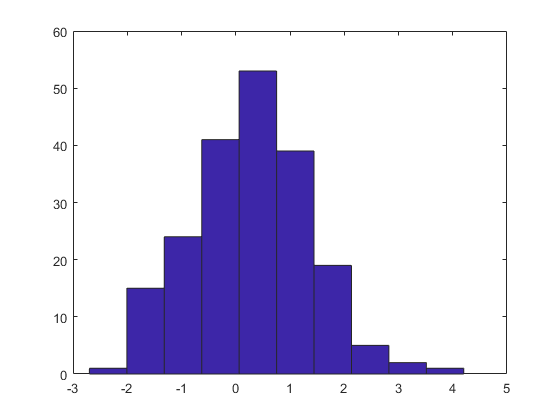

In [19]:
hist(y)

In [20]:
% OLS estimate
X = [ones(length(x),1), x];
bols = (X'*X)\(X'*y)


bols =

    0.1269
    0.2694




## Work between MATLAB and STATA